# **Are animal adoption rates correlated with their PetFinder profile?** 

#### In this study, data from PetFinder.com will be analyzed to determine how an animal’s PetFinder profile affects the rates at which animals get adopted. The dataset was obtained from Kaggle (https://www.kaggle.com/c/petfinder-adoption-prediction/data). 

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

In [ ]:
# Read in Dataset
df_all = pd.read_csv(r'C:\Users\julia\Dropbox\Data Science 2\Petfinder\train.csv')
print(f"The dataset contains the information of {len(df_all)} and {len(df_all.columns)} variables.")

#### The following data fields are available for each animal:

In [3]:
df_all.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

# Description of columns:

PetID - Unique hash ID of pet profile<br>

AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.<br>

Type - Type of animal (1 = Dog, 2 = Cat)<br>

Name - Name of pet (Empty if not named)<br>

Age - Age of pet when listed, in months<br>

Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)<br>

Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)<br>

Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)<br>

Color1 - Color 1 of pet (Refer to ColorLabels dictionary)<br>

Color2 - Color 2 of pet (Refer to ColorLabels dictionary)<br>

Color3 - Color 3 of pet (Refer to ColorLabels dictionary)<br>

MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)<br>

FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)<br>

Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)<br>

Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)<br>

Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)<br>

Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)<br>

Quantity - Number of pets represented in profile<br>

Fee - Adoption fee (0 = Free)<br>

State - State location in Malaysia (Refer to StateLabels dictionary)<br>

RescuerID - Unique hash ID of rescuer<br>

VideoAmt - Total uploaded videos for this pet<br>

PhotoAmt - Total uploaded photos for this pet<br>


### Remove RescuerID, Description, and PetID

In [4]:
# Remove string columns
df_all=df_all.drop(['Name','RescuerID', 'Description', 'PetID'], axis=1)

In [5]:
df_all.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0,2


### Separate the dataframes for cats and dogs

In [6]:
# Separate the dataset into cats and dogs.
df_dog=df_all[df_all.Type==1]
df_cat=df_all[df_all.Type==2]

# Obtain counts for each adoption speed
dog_counts = df_dog['AdoptionSpeed'].value_counts(sort=False).sort_index()
cat_counts = df_cat['AdoptionSpeed'].value_counts(sort=False).sort_index()
all_counts = df_all['AdoptionSpeed'].value_counts(sort=False).sort_index()

### Distribution of Adoption Speed for Cats and Dogs

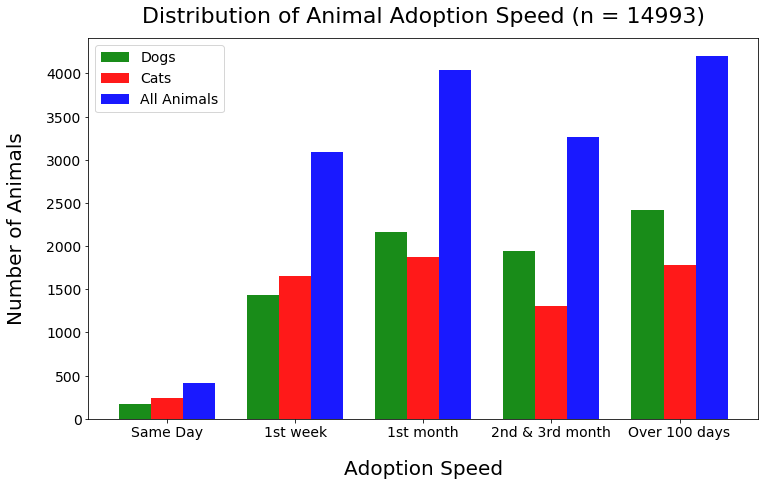

In [7]:
# create plot
fig, ax = plt.subplots(figsize=(12, 7))
labels = ('Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days')
index = np.arange(len(labels))
bar_width = 0.25
opacity = 0.9
 
rects1 = plt.bar(index , dog_counts, bar_width,
alpha=opacity,
color='g',
label='Dogs')

rects2 = plt.bar(index + bar_width, cat_counts, bar_width,
alpha=opacity,
color='r',
label='Cats')
     
rects3 = plt.bar(index + 2*bar_width, all_counts, bar_width,
alpha=opacity,
color='b',
label='All Animals')
 
plt.xlabel('Adoption Speed',fontsize=20, labelpad=20)
plt.ylabel('Number of Animals',fontsize=20, labelpad=20)
plt.title('Distribution of Animal Adoption Speed (n = ' + str(len(df_all)) + ')',fontsize=22,y=1.025)
plt.xticks(index + bar_width, labels,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, prop={'size': 14})
 

There do not appear to be significant differences in adoption rate between cats and dogs.

### Which factors adoption speed?

Text(0.5, 1, 'Cats')

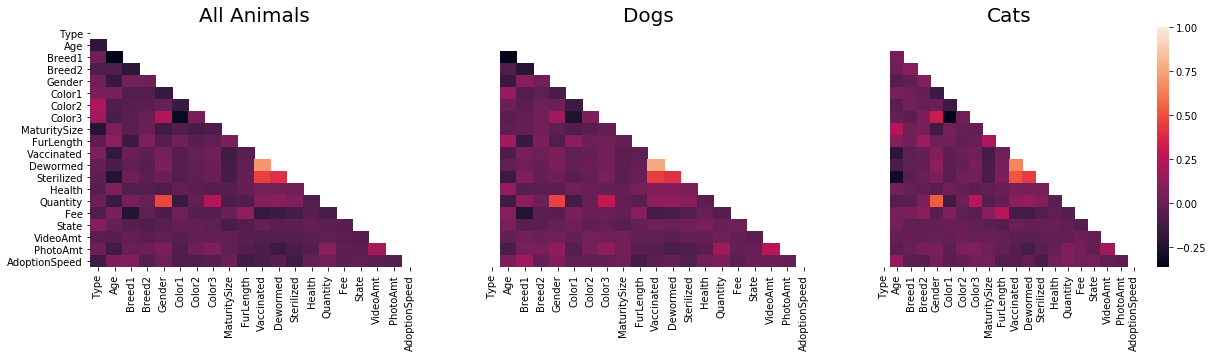

In [8]:
# Create a heatmap describing the correlation between different factors

# Set up the matplotlib figure.
plt.figure(figsize=(20,15))

# Make the correlation matrix for all animals
corr_mat_all = df_all.corr()
mask_all = np.zeros_like(corr_mat_all, dtype=np.bool)
mask_all[np.triu_indices_from(mask_all)] = True
plt.subplot(3,3,1)
sns.heatmap(corr_mat_all, mask=mask_all, cbar=False)
plt.title('All Animals',fontsize=20)

# Make the correlation matrix for dogs
corr_mat_dog = df_dog.corr()
mask_dog = np.zeros_like(corr_mat_dog, dtype=np.bool)
mask_dog[np.triu_indices_from(mask_dog)] = True
plt.subplot(3,3,2)
sns.heatmap(corr_mat_dog, mask=mask_dog, cbar=False, yticklabels=False)
plt.title('Dogs',fontsize=20)


# Make the correlation matrix for cats
corr_mat_cat = df_cat.corr()
mask_cat = np.zeros_like(corr_mat_cat, dtype=np.bool)
mask_cat[np.triu_indices_from(mask_cat)] = True
plt.subplot(3,3,3)
sns.heatmap(corr_mat_cat, mask=mask_cat, yticklabels=False)
plt.title('Cats',fontsize=20)




Text(0.5, 1.0, 'Cats')

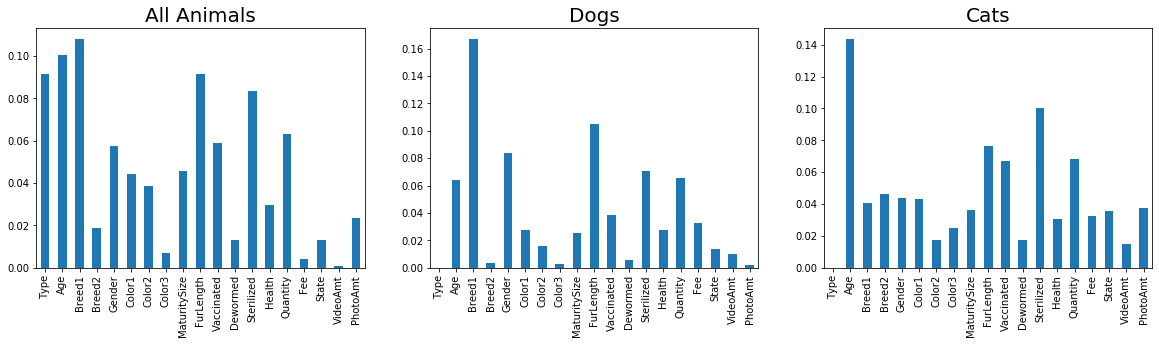

In [10]:
# Look at the correlations with for each factor with adoption speed more closely
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
correlations=abs(corr_mat_all['AdoptionSpeed'][:-1])
correlations.plot.bar(rot=0)
plt.xticks(rotation='vertical')
plt.title('All Animals',fontsize=20)

plt.subplot(3,3,2)
correlations=abs(corr_mat_dog['AdoptionSpeed'][:-1])
correlations.plot.bar(rot=0)
plt.xticks(rotation='vertical')
plt.title('Dogs',fontsize=20)

plt.subplot(3,3,3)
correlations=abs(corr_mat_cat['AdoptionSpeed'][:-1])
correlations.plot.bar(rot=0)
plt.xticks(rotation='vertical')
plt.title('Cats',fontsize=20)

Primary breed appears to be the most important factor affecting dog adoptions, while age appears to be the most important feature for cat adoptions. Fees do not appear to have a significant impact on rates of adoption. 

## Does breed affect adoption rates in dogs?

### Since breed had the most signicant impact on adoption rates in dogs, the next step was to see if purebred dogs get adopted faster.

Look at the distribution of breeds in dogs:

Text(0, 0.5, 'Fraction of Animals')

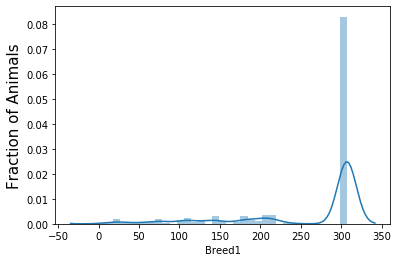

In [11]:
sns.distplot(df_dog['Breed1'])
plt.ylabel('Fraction of Animals',fontsize=15)

Most dogs are mixed breed. Look at the percentages of dog adoptions by breed.

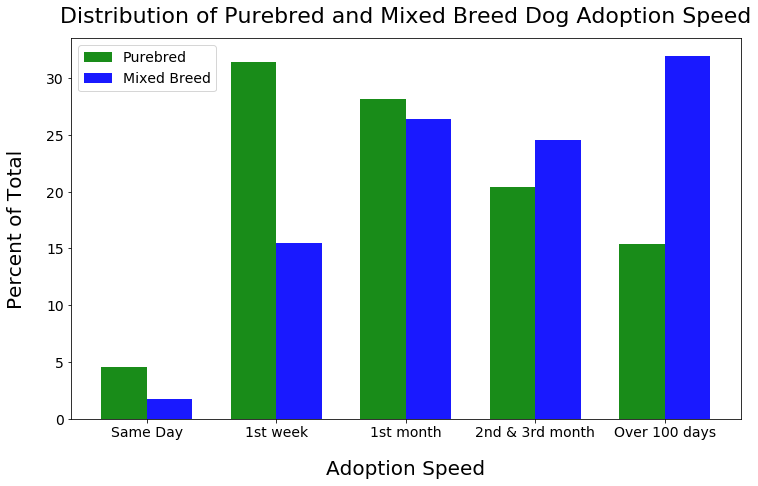

In [12]:
# A dog is purebred if primary breed does not equal 307 (breed codes were provided in attached spreadsheet) and if secondary
# breed is equal to 0
c1 = df_dog['Breed2']==0
c2 = df_dog['Breed1']!=307
c=c1&c2
Purebred=df_dog[c]

c1 = df_dog['Breed2']!=0
c2 = df_dog['Breed1']==307
c=c1|c2
Mixed = df_dog[c]

fig, ax = plt.subplots(figsize=(12, 7))
labels = ('Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days')
index = np.arange(len(labels))
bar_width = 0.35
opacity = 0.9

Purebred_counts = Purebred['AdoptionSpeed'].value_counts(sort=False).sort_index()
Mixed_counts = Mixed['AdoptionSpeed'].value_counts(sort=False).sort_index()
Purebred_percent = Purebred_counts/sum(Purebred_counts)*100
Mixed_percent=Mixed_counts/sum(Mixed_counts)*100
#sns.barplot(index,Purebred_counts)
#sns.barplot(index,Mixed_counts)
rects1 = plt.bar(index , Purebred_percent, bar_width,
alpha=opacity,
color='g',
label='Purebred')

rects2 = plt.bar(index + bar_width, Mixed_percent, bar_width,
alpha=opacity,
color='b',
label='Mixed Breed')

plt.xlabel('Adoption Speed',fontsize=20, labelpad=20)
plt.ylabel('Percent of Total',fontsize=20, labelpad=20)
plt.title('Distribution of Purebred and Mixed Breed Dog Adoption Speed' ,fontsize=22,y=1.025)
plt.xticks(index + bar_width/2, labels,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, prop={'size': 14})

### A higher percentage of purebred dogs are adopted on the same day and first week than mixed breed dogs.

### Does age influence adoption speed?

Text(0.5, 1.0, 'Cats')

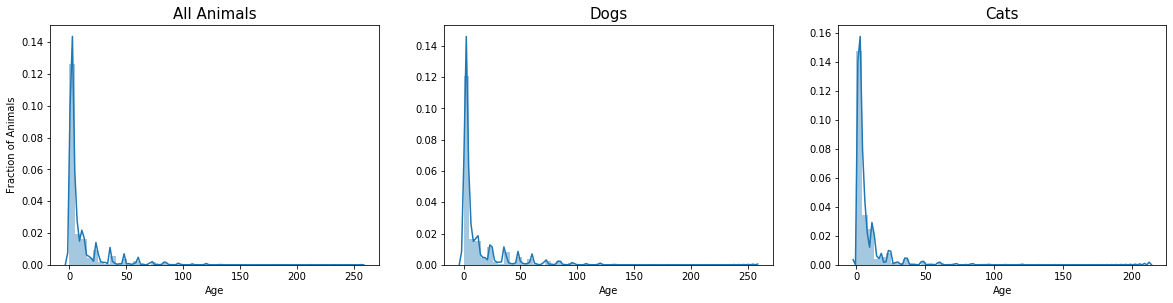

In [13]:
# Look at distribution of ages
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.distplot(df_all['Age'])
plt.title('All Animals', fontsize=15)
plt.ylabel('Fraction of Animals', fontsize=10)

plt.subplot(3,3,2)
sns.distplot(df_dog['Age'])
plt.title('Dogs',fontsize=15)

plt.subplot(3,3,3)
sns.distplot(df_cat['Age'])
plt.title('Cats',fontsize=15)

In [14]:
#There probably are not any animals over the age of 30, so they can removed. The above cells (for breed) were rerun 
#following this removal to determine if any changes occured. The trends were generally the same as prior to removal.
df_all = df_all[df_all['Age']<30]
df_dog = df_dog[df_dog['Age']<30]
df_cat = df_cat[df_cat['Age']<30]

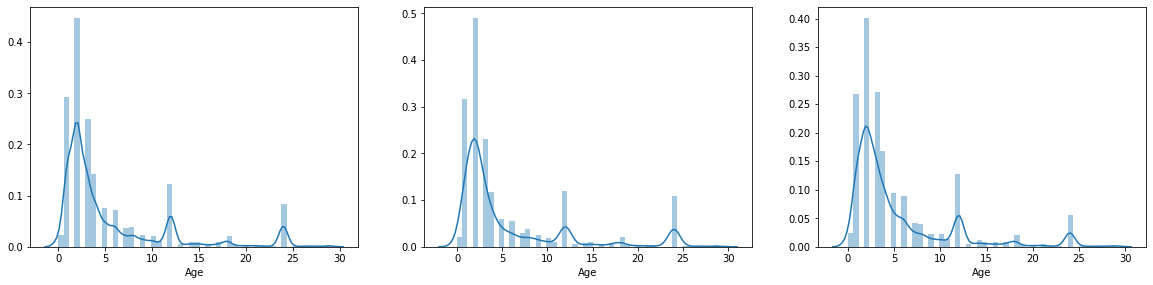

In [15]:
# Look at distribution of ages again to 
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.distplot(df_all['Age'])

plt.subplot(3,3,2)
sns.distplot(df_dog['Age'])

plt.subplot(3,3,3)
sns.distplot(df_cat['Age'])

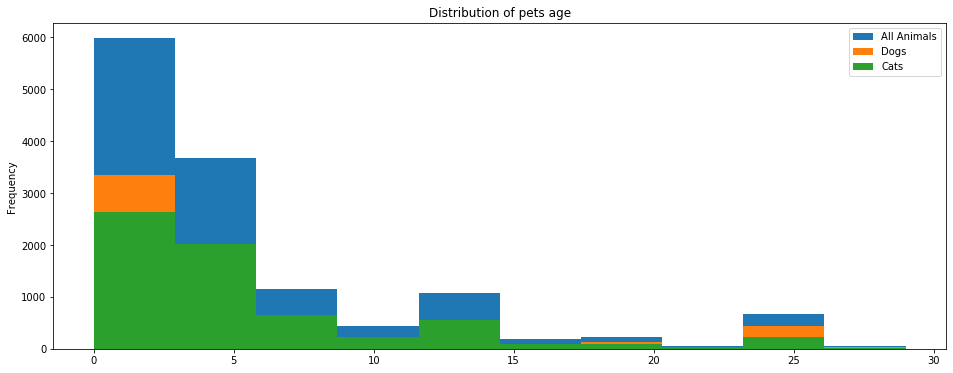

In [16]:
# Look at distributions on same plot, since they look very similar.
fig, ax = plt.subplots(figsize = (16, 6))
plt.title('Distribution of pets age')
df_all['Age'].plot('hist', label='All Animals')
df_dog['Age'].plot('hist', label='Dogs')
df_cat['Age'].plot('hist', label='Cats')
plt.legend()

Most animals are under 5 years old.

Text(0.5, 1.0, 'Adoption Speed by Age (Type 1 is Dog, Type 2 is Cat)')

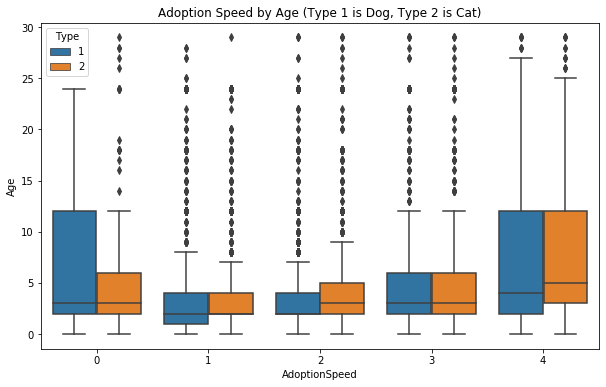

In [17]:
# Look at adoption speed by age
plt.figure(figsize=(10, 6))
sns.boxplot(x="AdoptionSpeed", y="Age", hue="Type", data=df_all)
plt.title('Adoption Speed by Age (Type 1 is Dog, Type 2 is Cat)')

It is difficult to make any interpretations from this figure due to the high number of outliers in age.

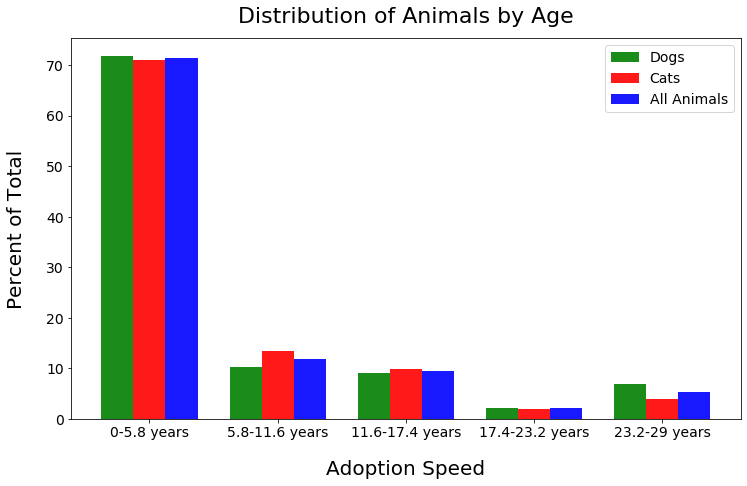

In [18]:
# Get age counts grouped into 5 bins, normalized since there were a larger amount of young animals
all_ages=df_all['Age'].value_counts(sort=False, bins=5, normalize=True).sort_index()
dog_ages=df_dog['Age'].value_counts(sort=False, bins=5,normalize=True).sort_index()
cat_ages=df_cat['Age'].value_counts(sort=False, bins=5,normalize=True).sort_index()

fig, ax = plt.subplots(figsize=(12, 7))
labels = ('Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days')
labels = ('0-5.8 years', '5.8-11.6 years', '11.6-17.4 years', '17.4-23.2 years', '23.2-29 years')
index = np.arange(len(labels))
bar_width = 0.25
opacity = 0.9
 
rects1 = plt.bar(index , dog_ages*100, bar_width,
alpha=opacity,
color='g',
label='Dogs')

rects2 = plt.bar(index + bar_width, cat_ages*100, bar_width,
alpha=opacity,
color='r',
label='Cats')
     
rects3 = plt.bar(index + 2*bar_width, all_ages*100, bar_width,
alpha=opacity,
color='b',
label='All Animals')
 
plt.xlabel('Adoption Speed',fontsize=20, labelpad=20)
plt.ylabel('Percent of Total',fontsize=20, labelpad=20)
plt.title('Distribution of Animals by Age',fontsize=22,y=1.025)
plt.xticks(index + bar_width, labels,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=1, prop={'size': 14})

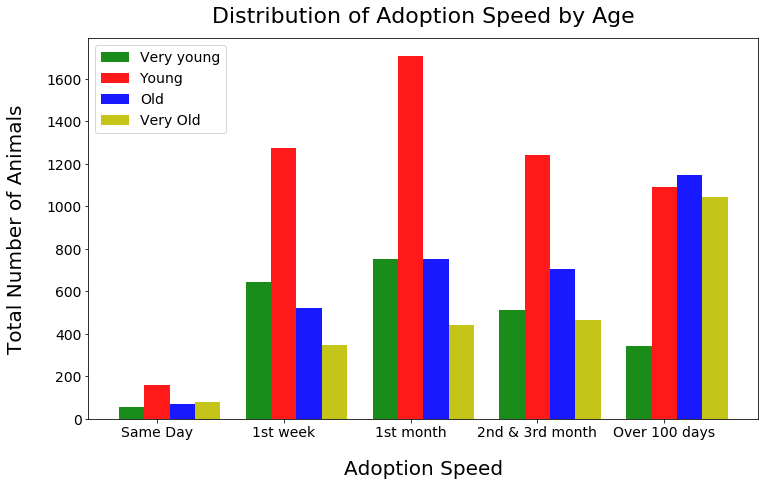

In [19]:
# Since the age distributions look similar, look at all animals for correlations with adoption speed (not dogs and dogs separately)
c1= df_all['Age']>0
c2 = df_all['Age']>1
c3 = df_all['Age']>3
c4 = df_all['Age']>10

c_veryyoung = c1&~c2
very_young = df_all[c_veryyoung]
c_young = c2&~c3
young = df_all[c_young]
c_old = c3&~c4
old = df_all[c_old]
very_old = df_all[c4]

very_young_speeds=very_young['AdoptionSpeed'].value_counts(sort=False).sort_index()
young_speeds=young['AdoptionSpeed'].value_counts(sort=False).sort_index()
old_speeds=old['AdoptionSpeed'].value_counts(sort=False).sort_index()
very_old_speeds=very_old['AdoptionSpeed'].value_counts(sort=False).sort_index()

fig, ax = plt.subplots(figsize=(12, 7))
labels = ('Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days')
index = np.arange(len(labels))
bar_width = 0.2
opacity = 0.9
 
rects1 = plt.bar(index , very_young_speeds, bar_width,
alpha=opacity,
color='g',
label='Very young')

rects2 = plt.bar(index + bar_width, young_speeds, bar_width,
alpha=opacity,
color='r',
label='Young')
     
rects3 = plt.bar(index + 2*bar_width, old_speeds, bar_width,
alpha=opacity,
color='b',
label='Old')

rects3 = plt.bar(index + 3*bar_width, very_old_speeds, bar_width,
alpha=opacity,
color='y',
label='Very Old')
 
plt.xlabel('Adoption Speed',fontsize=20, labelpad=20)
plt.ylabel('Total Number of Animals',fontsize=20, labelpad=20)
plt.title('Distribution of Adoption Speed by Age',fontsize=22,y=1.025)
plt.xticks(index + bar_width, labels,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, prop={'size': 14})

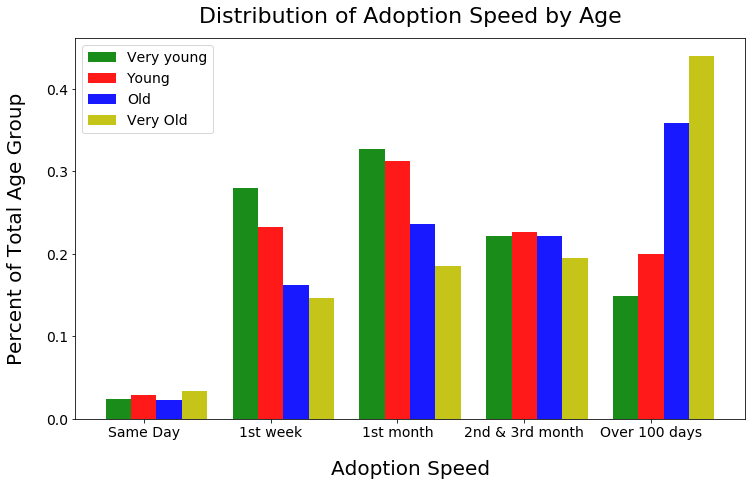

In [20]:
# Due to the higher numbers of young animals, it is difficult to make conclusions from numbers alone. 

very_young_speeds=very_young['AdoptionSpeed'].value_counts(sort=False, bins=5, normalize=True).sort_index()
young_speeds=young['AdoptionSpeed'].value_counts(sort=False, bins=5,normalize=True).sort_index()
old_speeds=old['AdoptionSpeed'].value_counts(sort=False, bins=5,normalize=True).sort_index()
very_old_speeds=very_old['AdoptionSpeed'].value_counts(sort=False, bins=5,normalize=True).sort_index()

fig, ax = plt.subplots(figsize=(12, 7))
labels = ('Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days')
index = np.arange(len(labels))
bar_width = 0.2
opacity = 0.9
 
rects1 = plt.bar(index , very_young_speeds, bar_width,
alpha=opacity,
color='g',
label='Very young')

rects2 = plt.bar(index + bar_width, young_speeds, bar_width,
alpha=opacity,
color='r',
label='Young')
     
rects3 = plt.bar(index + 2*bar_width, old_speeds, bar_width,
alpha=opacity,
color='b',
label='Old')

rects3 = plt.bar(index + 3*bar_width, very_old_speeds, bar_width,
alpha=opacity,
color='y',
label='Very Old')
 
plt.xlabel('Adoption Speed',fontsize=20, labelpad=20)
plt.ylabel('Percent of Total Age Group',fontsize=20, labelpad=20)
plt.title('Distribution of Adoption Speed by Age',fontsize=22,y=1.025)
plt.xticks(index + bar_width, labels,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, prop={'size': 14})

A higher percentage of older animals remain unadopted after 100 days.

### Does gender influence adoption speed?

Text(0.5, 1.025, 'Cats')

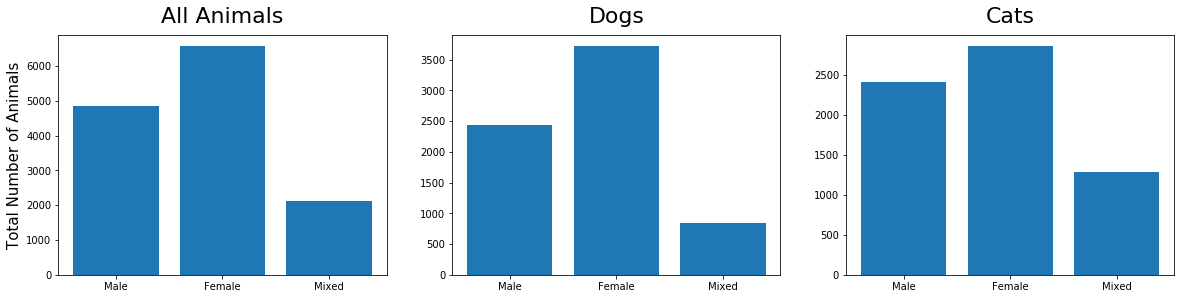

In [21]:
# Look at distribution of gender, 1 is male, 2 is female, 3 is mixed for groups of pets
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
#plt.hist(df_all['Gender'], bins=3)
plt.bar(['Male','Female','Mixed'],df_all['Gender'].value_counts(sort=False).sort_index())
plt.ylabel('Total Number of Animals',fontsize=15)
plt.title('All Animals',fontsize=22,y=1.025)

plt.subplot(3,3,2)
plt.bar(['Male','Female','Mixed'],df_dog['Gender'].value_counts(sort=False).sort_index())
plt.title('Dogs',fontsize=22,y=1.025)

plt.subplot(3,3,3)
plt.bar(['Male','Female','Mixed'],df_cat['Gender'].value_counts(sort=False).sort_index())
plt.title('Cats',fontsize=22,y=1.025)


There are more females in the shelters of both cats and dogs.

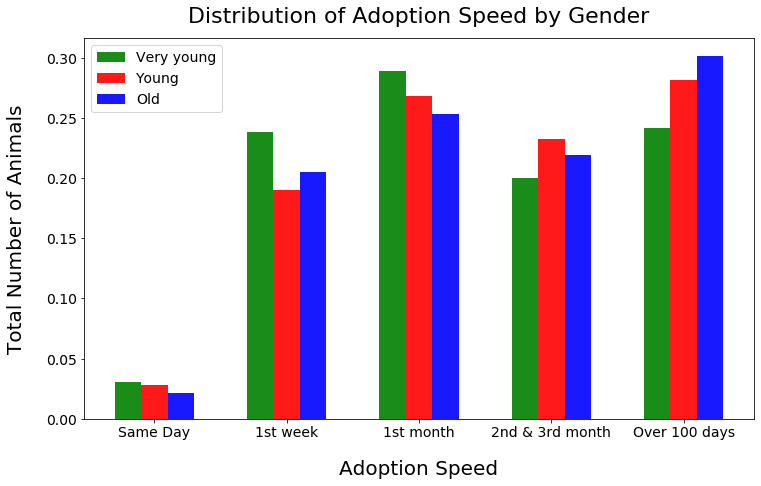

In [23]:
# Since the gender distributions look similar, look at all animals for correlations with adoption speed (not dogs and dogs separately)

male = df_all[df_all['Gender']==1]
female = df_all[df_all['Gender']==2]
mixed = df_all[df_all['Gender']==3]

male_count=male['AdoptionSpeed'].value_counts(sort=False, normalize=True).sort_index()
female_count=female['AdoptionSpeed'].value_counts(sort=False,normalize=True).sort_index()
mixed_count=mixed['AdoptionSpeed'].value_counts(sort=False,normalize=True).sort_index()

fig, ax = plt.subplots(figsize=(12, 7))
labels = ('Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days')
index = np.arange(len(labels))
bar_width = 0.2
opacity = 0.9
 
rects1 = plt.bar(index , male_count, bar_width,
alpha=opacity,
color='g',
label='Very young')

rects2 = plt.bar(index + bar_width, female_count, bar_width,
alpha=opacity,
color='r',
label='Young')
     
rects3 = plt.bar(index + 2*bar_width, mixed_count, bar_width,
alpha=opacity,
color='b',
label='Old')
 
plt.xlabel('Adoption Speed',fontsize=20, labelpad=20)
plt.ylabel('Total Number of Animals',fontsize=20, labelpad=20)
plt.title('Distribution of Adoption Speed by Gender',fontsize=22,y=1.025)
plt.xticks(index + bar_width, labels,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, prop={'size': 14})

No obvious trends between adoption rate and gender.

# Proposed further research

Look at adoption rates in other countries. This dataset looks at only adoptions in Malaysia. It would be interesting to look at adoption rates in the US and see how the trends compare with adoption rates in Malaysia. This data could be obtained and analyzed from the petfinder website. Then the data could be further separated by state and county.

Kaggle also provides images, videos, and descriptions of the animals. Sentiment analysis could be performed on the descriptions to determine if animals are more likely to get adopted based on description. The images and videos could also be analyzed to determine if there are any features common to the animals that are adopted out faster.